In [119]:
import pandas as pd

In [120]:
import yfinance as yf
import datetime as dt

In [121]:
start = dt.datetime(2013,6,1)
end = dt.datetime(2022,2,11)
stk_data = yf.download('TATACOFFEE.NS',start=start,end=end)

[*********************100%%**********************]  1 of 1 completed


In [122]:
stk_data=stk_data[["Open","High","Low","Close"]]
stk_data
#stk_data.to_csv("Tatacoffee13_21.csv")

,Open,High,Low,Close
Date,,,,
2013-06-03,148.500000,149.750000,145.100006,146.740005
2013-06-04,145.300003,150.899994,145.300003,146.214996
2013-06-05,144.899994,147.000000,144.899994,145.949997
2013-06-06,146.500000,147.000000,145.535004,146.369995
2013-06-07,146.619995,148.485001,144.600006,145.169998
...,...,...,...,...
2022-02-04,217.500000,217.649994,213.000000,213.550003
2022-02-07,213.550003,215.300003,210.199997,211.649994
2022-02-08,212.000000,213.500000,208.100006,210.750000


In [ ]:
#column="Close"

In [123]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data)
print("Len:",data1.shape)

Len: (2144, 4)


In [173]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])
len(data1)

2144

In [125]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

1715
X_train length: (1715, 4)
X_test length: (429, 4)
y_train length: (1715, 4)
y_test length: (429, 4)


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [126]:
performance={"Model":[],"RMSE":[],"MaPe":[],"Lag":[],"Test":[]}

In [127]:
def cominbation(dataset,listt):
    print(listt)
    datasetTwo=dataset[listt]
    test_obs = 28
    train =datasetTwo[:-test_obs]
    test = datasetTwo[-test_obs:]
    from statsmodels.tsa.api import VAR
    for i in [1,2,3,4,5,6,7,8,9,10]:
        model = VAR(train)
        results = model.fit(i)
        print('Order =', i)
        print('AIC: ', results.aic)
        print('BIC: ', results.bic)
        print()
    x = model.select_order(maxlags=12)
    order=x.selected_orders["aic"]
    result = model.fit(order)
    #result.summary()
    lagged_Values = train.values[-order:]
    pred = result.forecast(y=lagged_Values,steps=28) 
    preds=pd.DataFrame(pred,columns=listt)
    preds.to_csv("varforecasted_{}.csv".format(test_obs))
    from sklearn.metrics import mean_squared_error
    rmse= round(mean_squared_error(test,pred,squared=False))
    from sklearn.metrics import mean_absolute_percentage_error
    mape=mean_absolute_percentage_error(test,pred)
    performance["Model"].append(listt)
    performance["RMSE"].append(rmse)
    performance["MaPe"].append(mape)
    performance["Lag"].append(order)
    performance["Test"].append(test_obs)
    perf=pd.DataFrame(performance)
    return perf,result,pred

In [128]:
datasetTwo=data1[listt]
test_obs = 28
train =datasetTwo[:-test_obs]
test = datasetTwo[-test_obs:]
from statsmodels.tsa.api import VAR
for i in [1,2,3,4,5,6,7,8,9,10]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()
x = model.select_order(maxlags=12)
order=x.selected_orders["aic"]
result = model.fit(order)
    #result.summary()
lagged_Values = train.values[-order:]
pred = result.forecast(y=lagged_Values,steps=28) 
preds=pd.DataFrame(pred,columns=listt)
preds.to_csv("varforecasted_{}.csv".format(test_obs))
from sklearn.metrics import mean_squared_error
rmse= round(mean_squared_error(test,pred,squared=False))
from sklearn.metrics import mean_absolute_percentage_error
mape=mean_absolute_percentage_error(test,pred)
performance["Model"].append(listt)
performance["RMSE"].append(rmse)
performance["MaPe"].append(mape)
performance["Lag"].append(order)
performance["Test"].append(test_obs)
perf=pd.DataFrame(performance)

Order = 1
AIC:  -39.01658695115506
BIC:  -38.96309465714579

Order = 2
AIC:  -39.03829448421904
BIC:  -38.94197086170651

Order = 3
AIC:  -39.04492675169867
BIC:  -38.90573842755478

Order = 4
AIC:  -39.05374294732975
BIC:  -38.87165650611376

Order = 5
AIC:  -39.058265202334766
BIC:  -38.83324718621953

Order = 6
AIC:  -39.0581561960395
BIC:  -38.7901731047376

Order = 7
AIC:  -39.05854999363087
BIC:  -38.747568284320515

Order = 8
AIC:  -39.20163930391487
BIC:  -38.84762539116568

Order = 9
AIC:  -39.33826961324309
BIC:  -38.941189868941706

Order = 10
AIC:  -39.34174393783819
BIC:  -38.90156469111369



In [129]:
listt=["Close","High","Open","Low"]
#listt=["AQI_calculated","PM10","PM2.5","NOx","NO2","NO","NH3","SO2","CO",'year']

In [130]:
perf,result,pred = cominbation(data1,listt)

['Close', 'High', 'Open', 'Low']
Order = 1
AIC:  -39.01658695115506
BIC:  -38.96309465714579

Order = 2
AIC:  -39.03829448421904
BIC:  -38.94197086170651

Order = 3
AIC:  -39.04492675169867
BIC:  -38.90573842755478

Order = 4
AIC:  -39.05374294732975
BIC:  -38.87165650611376

Order = 5
AIC:  -39.058265202334766
BIC:  -38.83324718621953

Order = 6
AIC:  -39.0581561960395
BIC:  -38.7901731047376

Order = 7
AIC:  -39.05854999363087
BIC:  -38.747568284320515

Order = 8
AIC:  -39.20163930391487
BIC:  -38.84762539116568

Order = 9
AIC:  -39.33826961324309
BIC:  -38.941189868941706

Order = 10
AIC:  -39.34174393783819
BIC:  -38.90156469111369



In [131]:
data1

,Open,High,Low,Close
0,0.517223,0.485749,0.529877,0.522210
1,0.500522,0.491400,0.530969,0.519394
2,0.498434,0.472236,0.528786,0.517972
3,0.506785,0.472236,0.532251,0.520225
4,0.507411,0.479533,0.527149,0.513788
...,...,...,...,...
2139,0.877349,0.819410,0.900409,0.880633
2140,0.856733,0.807862,0.885130,0.870440
2141,0.848643,0.799017,0.873670,0.865612
2142,0.864301,0.810565,0.892224,0.873927


In [132]:
perf

,Model,RMSE,MaPe,Lag,Test
0,"[Close, High, Open, Low]",0,0.023686,10,28
1,"[Close, High, Open, Low]",0,0.023686,10,28


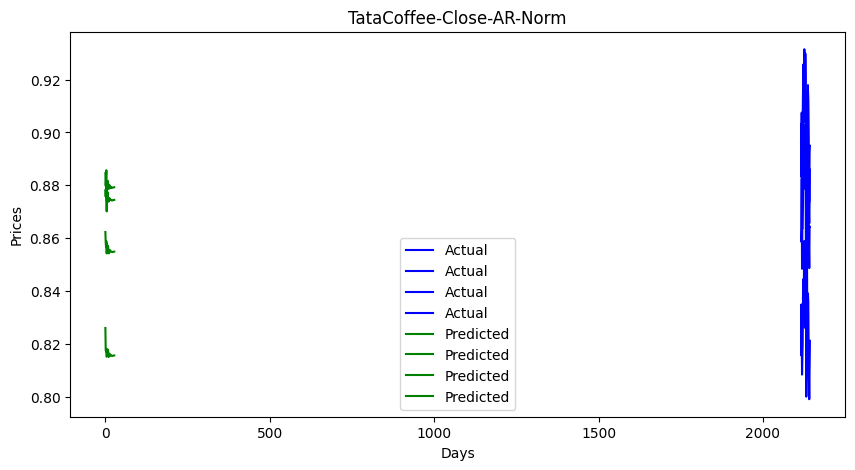

In [133]:
from stockFunctions import graph
graph(test,preds,"Actual","Predicted","TataCoffee-Close-AR-Norm","Days","Prices")

In [153]:
test

,Close,High,Open,Low
2116,0.883315,0.815725,0.858820,0.896589
2117,0.903433,0.834889,0.863779,0.897408
2118,0.887607,0.824570,0.882568,0.907503
2119,0.882779,0.808354,0.848382,0.889768
2120,0.878755,0.814496,0.863779,0.897681
2121,0.891899,0.819902,0.863779,0.905593
2122,0.904238,0.839803,0.874739,0.915962
2123,0.906652,0.844472,0.889353,0.925784
2124,0.907994,0.835381,0.886482,0.923056
2125,0.916577,0.849140,0.878914,0.917053


In [152]:
# Create a DataFrame with the specified index range and columns "Close", "High", "Open", "Low"
Actual_y_train = pd.DataFrame(test, columns=["Close", "High", "Open", "Low"])
Actual_y_train

,Close,High,Open,Low
2116,0.883315,0.815725,0.858820,0.896589
2117,0.903433,0.834889,0.863779,0.897408
2118,0.887607,0.824570,0.882568,0.907503
2119,0.882779,0.808354,0.848382,0.889768
2120,0.878755,0.814496,0.863779,0.897681
2121,0.891899,0.819902,0.863779,0.905593
2122,0.904238,0.839803,0.874739,0.915962
2123,0.906652,0.844472,0.889353,0.925784
2124,0.907994,0.835381,0.886482,0.923056
2125,0.916577,0.849140,0.878914,0.917053


In [155]:
actual_stock_price_test_ori=Ms.inverse_transform(Actual_y_train)
actual_stock_price_test_ori

array([[218.6432407 , 216.8999939 , 205.37884604, 216.52426248],
       [222.49785438, 220.80000305, 206.28744177, 216.67683472],
       [219.46556142, 218.69999695, 209.73055828, 218.55864176],
       [218.54044473, 215.3999939 , 203.46600678, 215.25277543],
       [217.769522  , 216.6499939 , 206.28744177, 216.7276973 ],
       [220.28786646, 217.75      , 206.28744177, 218.20261918],
       [222.65203265, 221.80000305, 208.29592884, 220.1352888 ],
       [223.11458315, 222.75      , 210.97390672, 221.96621774],
       [223.3715574 , 220.8999939 , 210.44787301, 221.45762292],
       [225.01619884, 223.69999695, 209.06106746, 220.33872363],
       [226.24967208, 225.69999695, 212.88674599, 223.03426997],
       [222.60063466, 224.19999695, 213.46058901, 221.20332551],
       [222.60063466, 219.        , 209.25234847, 218.45691659],
       [224.45085236, 224.3999939 , 210.68697792, 222.72910997],
       [224.29667409, 224.3999939 , 208.96541966, 220.99989069],
       [212.42446084, 220

In [156]:
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [157]:
actual_stock_price_test_oriA

,Close,High,Open,Low
0,218.643241,216.899994,205.378846,216.524262
1,222.497854,220.800003,206.287442,216.676835
2,219.465561,218.699997,209.730558,218.558642
3,218.540445,215.399994,203.466007,215.252775
4,217.769522,216.649994,206.287442,216.727697
5,220.287866,217.75,206.287442,218.202619
6,222.652033,221.800003,208.295929,220.135289
7,223.114583,222.75,210.973907,221.966218
8,223.371557,220.899994,210.447873,221.457623
9,225.016199,223.699997,209.061067,220.338724


In [158]:
preds

,Close,High,Open,Low
0,0.878077,0.825982,0.862324,0.884579
1,0.875689,0.817559,0.858365,0.879810
2,0.879318,0.817036,0.856617,0.882667
3,0.875373,0.818071,0.858831,0.885699
4,0.870123,0.815102,0.854199,0.873987
5,0.876231,0.816412,0.857746,0.879134
6,0.875941,0.817234,0.856400,0.879806
7,0.877380,0.817867,0.855667,0.881702
8,0.875020,0.817707,0.857010,0.881222
9,0.874356,0.816515,0.855905,0.879350


In [159]:
actual_stock_price_test_ori_p=Ms.inverse_transform(preds)
actual_stock_price_test_ori_p

array([[217.63953594, 218.98734536, 206.02092137, 214.28554671],
       [217.1819316 , 217.27330128, 205.29538614, 213.39667862],
       [217.87731379, 217.16671959, 204.97498906, 213.92912681],
       [217.12142994, 217.37751238, 205.3807694 , 214.49424315],
       [216.11551536, 216.77325314, 204.5319836 , 212.31121283],
       [217.28579086, 217.03979596, 205.18200663, 213.27050857],
       [217.23036831, 217.20719213, 204.93537395, 213.39586701],
       [217.50596714, 217.33588691, 204.8009086 , 213.74925845],
       [217.05386129, 217.30327639, 205.0470797 , 213.65977633],
       [216.9266245 , 217.06088213, 204.84453707, 213.31091776],
       [216.81914946, 216.75184757, 204.66330857, 213.17450292],
       [216.94264986, 216.85208625, 204.53598003, 213.21519849],
       [217.08405378, 216.91584383, 204.6545758 , 213.44863232],
       [217.06177393, 217.00467495, 204.72453268, 213.41512237],
       [216.94295489, 216.84697433, 204.77106486, 213.28498353],
       [216.947226  , 216

In [163]:
actual_stock_price_test_ori_pr=conversionSingle(actual_stock_price_test_ori_p,[column])
actual_stock_price_test_ori_pr

,Close,High,Open,Low
0,217.639536,218.987345,206.020921,214.285547
1,217.181932,217.273301,205.295386,213.396679
2,217.877314,217.16672,204.974989,213.929127
3,217.12143,217.377512,205.380769,214.494243
4,216.115515,216.773253,204.531984,212.311213
5,217.285791,217.039796,205.182007,213.270509
6,217.230368,217.207192,204.935374,213.395867
7,217.505967,217.335887,204.800909,213.749258
8,217.053861,217.303276,205.04708,213.659776
9,216.926624,217.060882,204.844537,213.310918


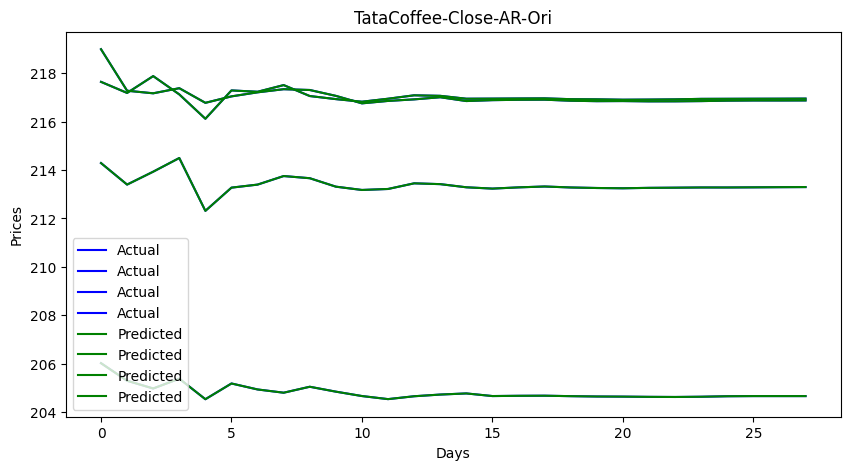

In [165]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,actual_stock_price_test_ori_pr,"Actual","Predicted","TataCoffee-Close-AR-Ori","Days","Prices")

In [166]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,actual_stock_price_test_ori_pr)

RMSE-Testset: 0.0
maPe-Testset: 0.0


In [207]:
forecast_values = results.forecast(y=lagged_Values, steps=5)

In [208]:
forecast_values

array([[0.87807691, 0.82598206, 0.86232426, 0.8845791 ],
       [0.87568858, 0.81755924, 0.858365  , 0.87981049],
       [0.87931792, 0.8170355 , 0.85661658, 0.88266697],
       [0.87537281, 0.81807134, 0.85883094, 0.88569871],
       [0.87012273, 0.815102  , 0.85419909, 0.87398718]])

In [210]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast_values,["Open","High","Low","Close"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Open","High","Low","Close"])

In [211]:
forecast_stock_price_test_oriF

,Open,High,Low,Close
0,217.639536,218.987345,206.020921,214.285547
1,217.181932,217.273301,205.295386,213.396679
2,217.877314,217.16672,204.974989,213.929127
3,217.12143,217.377512,205.380769,214.494243
4,216.115515,216.773253,204.531984,212.311213
